In [1]:
import keras
from acgan import ACGAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import cv2

Using TensorFlow backend.


In [2]:
train = pd.read_csv("data/fashion-mnist_train.csv")
test = pd.read_csv("data/fashion-mnist_test.csv")

In [3]:
def split_data_target(df, target='label'):
    
    X, y = df.drop(target, axis=1), df[target]
    
    return X, y

In [5]:
X_train, y_train = split_data_target(df=train)
X_test, y_test = split_data_target(df=test)

In [6]:
img_dim = np.int(np.sqrt(X_train.values[0].shape[0]))
img_channels = 1

In [7]:
print("Image shape:", X_train.values[0].shape)
print("Reshaped Image shape:", X_train.values[0].reshape(img_dim, img_dim).shape)

Image shape: (784,)
Reshaped Image shape: (28, 28)


In [8]:
def plot_random(shape=(1,4)):
    
    _, axarr = plt.subplots(shape[0], shape[1], figsize=(18, 12))
    data_size = X_train.shape[0]
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            
            rand_int = np.random.randint(0, data_size)
            
            rand_img = X_train.values[rand_int].reshape(img_dim, img_dim, 1)
            rand_label = y_train.values[rand_int]
            
            if shape[0]==1:
                axarr[i].imshow()
                axarr[i].set_title()
            else:
                axarr[i, j].imshow(X_train.values[rand_int].reshape(img_dim, img_dim), cmap='gray')
                axarr[i, j].set_title(y_train.values[rand_int])
    plt.show()

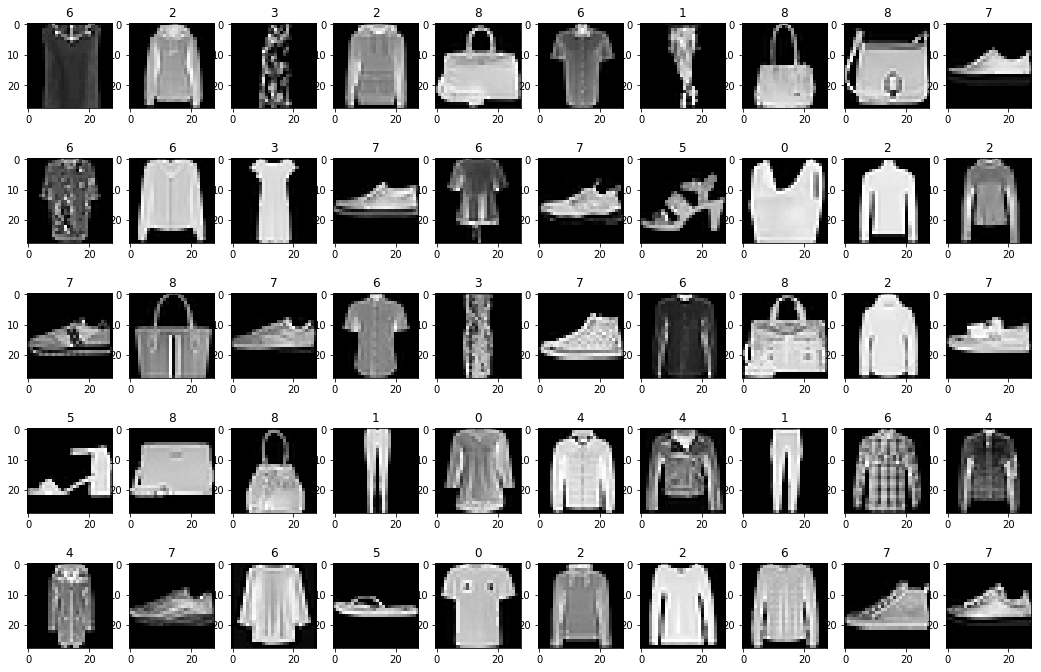

In [8]:
plot_random(shape=(5,10))

In [9]:
label_dict = {
    0: 'tshirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'boot'
}

In [10]:
def load_image_dataset(data, height=img_dim, width=img_dim):
    
    X, y = split_data_target(data)
    
    # formatting image data
    X = X.values.reshape(-1, height, width)
    
    # formatting image label
    y = y.values
    
    return X, y

In [11]:
X_train, y_train = load_image_dataset(train)
X_test, y_test = load_image_dataset(test)

In [12]:
# combining train-test data for better generation
X_combined = np.vstack([X_train, X_test])
y_combined = np.vstack([y_train.reshape(-1,1),
                        y_test.reshape(-1,1)]).reshape(-1)

In [13]:
input_classes = pd.Series(y_combined).nunique()

In [14]:
# Initializing ACGANs
fashion_acgan = ACGAN(img_dim, img_dim, img_channels,
                      input_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 8, 32)          0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
__________

NameError: name 'img' is not defined